# Projeto 1 - Modelo SIR
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def metRK4(f, r0, ti, tf, n):
    r = r0
    h = 0.1
    xpoints = []
    ypoints = []
    zpoints = []
    tpoints = np.arange(ti, tf + h, h)

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])

        k1 = h * f(r, t)
        k2 = h * f(r + k1 / 2, t + h / 2)
        k3 = h * f(r + k2 / 2, t + h / 2)
        k4 = h * f(r + k3, t + h)

        r += (1/6) * (k1 + 2*k2 + 2*k3 + k4)

    return np.array(xpoints), np.array(ypoints), np.array(zpoints), np.array(tpoints)

Definindo os parâmetros e a função das derivadas, de acordo com o sistema abaixo:

\begin{equation} \frac{dS}{dt}=\beta SI \quad \end{equation} \\ \begin{equation} \frac{dI}{dt}=\beta SI - \gamma I \quad \end{equation} \\ \begin{equation} \frac{dR}{dt}=\gamma I \quad \end{equation} \\ \begin{equation} R_0 = \frac{\beta}{\gamma} S_0 \quad \end{equation} \\

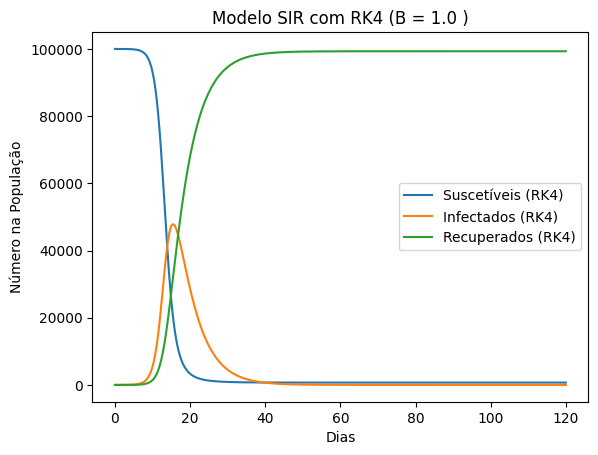

In [9]:
# Parâmetros do modelo SIR
B = 1.  # Número básico de reprodução, R0 = (beta/gamma) * S0
gamma = 0.2
days = 120  # Número total de dias

# Condições iniciais como valores absolutos na população
N = 100000
I0 = 2   # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis
R0 = 0    # Número inicial de recuperados

# Normalizando os valores
scale_factor = N  # Pode ajustar conforme necessário
S0 /= scale_factor
I0 /= scale_factor
R0 /= scale_factor

# Função de derivadas para o modelo SIR usando B
def sir_derivatives(r, t):
    S, I, R = r
    dS = -B * S * I
    dI = B * S * I - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

# Executando o modelo SIR usando a implementação RK4 fornecida
S_rk4, I_rk4, R_rk4, t_rk4 = metRK4(sir_derivatives, [S0, I0, R0], 0, days, 160)

# Desnormalizando os resultados
S_rk4 *= scale_factor
I_rk4 *= scale_factor
R_rk4 *= scale_factor

# Plotando os resultados
plt.plot(t_rk4, S_rk4, label='Suscetíveis (RK4)')
plt.plot(t_rk4, I_rk4, label='Infectados (RK4)')
plt.plot(t_rk4, R_rk4, label='Recuperados (RK4)')

plt.xlabel('Dias')
plt.ylabel('Número na População')
plt.title('Modelo SIR com RK4 (B = '+ str(B) + ' )')
plt.legend()
plt.show()
